<H2>Task 1</H2>

<b>1.Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.</b>

The aesthetics are income on x-axis, life expectancy on y-axis, colored by region and size by population.

<b>2.Import the q1data.csv dataset.</b>

In [51]:
import pandas as pd
import numpy as np
from plotnine import ggplot,aes,annotate,scale_size_continuous,geom_point,scale_color_manual,theme_light,labs,scale_x_log10,geom_boxplot,scale_x_continuous,scale_y_continuous,scale_fill_manual,scale_y_log10

In [52]:
q1data = pd.read_csv("q1data.csv") #importing data
print(q1data.size)

1773


In [53]:
q1data = q1data.dropna() #dropping missing values
print(q1data.size)

1719


In [54]:
print(q1data.columns) #checking columns

Index(['income', 'life_exp', 'population', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')


 <b>3.Recreate the plot as best you can using plotnine.</b>

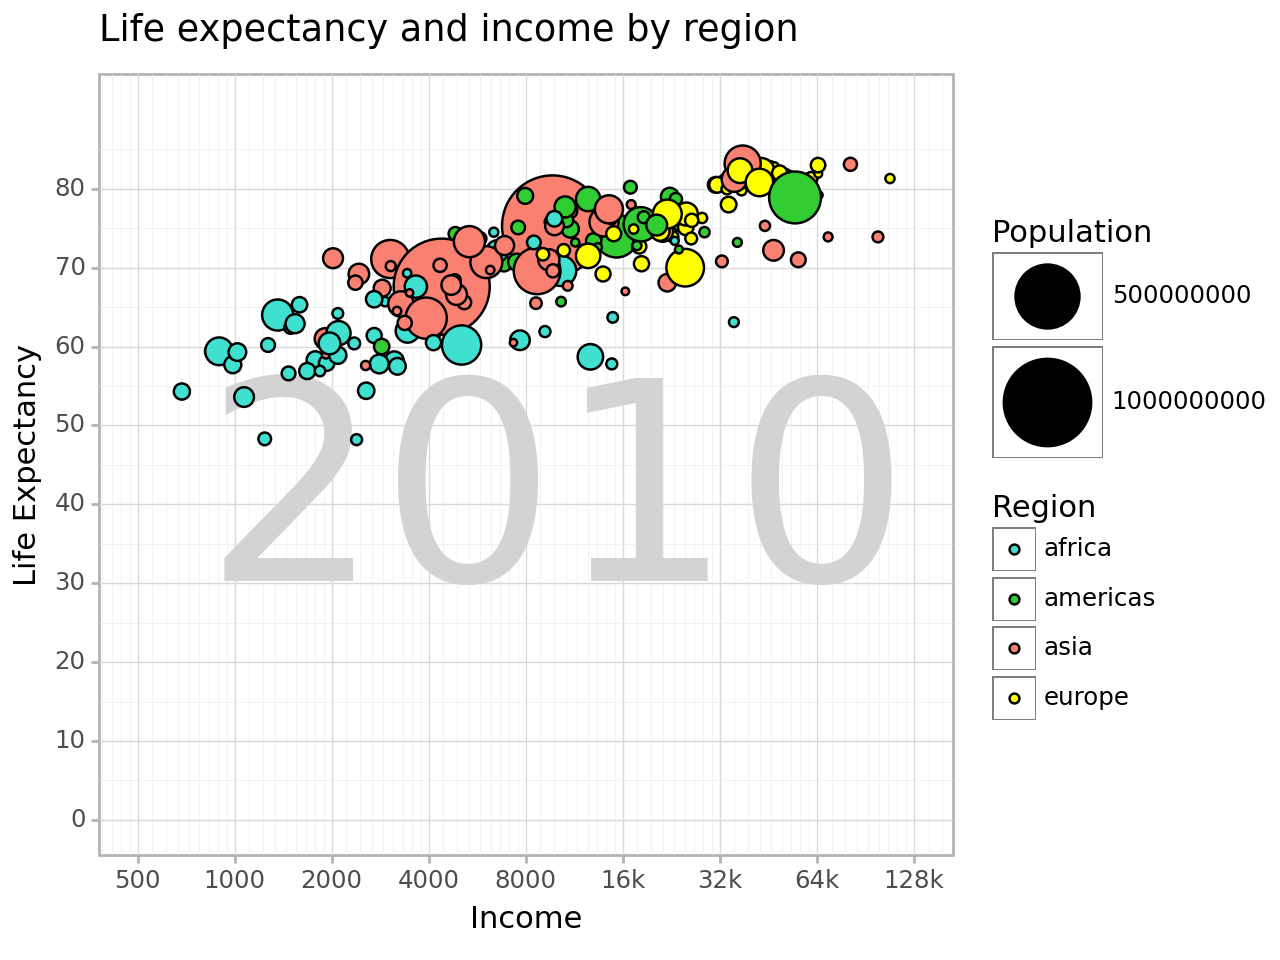

In [56]:
breaks_values = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000] #initializing axis values manually
labels_values = ['500', '1000', '2000', '4000', '8000', '16k', '32k', '64k','128k'] #initializing axis labels manually
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'} #setting up colors for regions manually
plot = (
    ggplot(q1data,
           aes(
               x='income',
               y='life_exp',
               fill='four_regions',
               size='population'
              )
           ) +
    annotate("text",
             x = 10000, #positioning label in the graph
             y = 40,
             label = "2010",
             size='100',
             color='lightgray'
             )+
    geom_point() +  
    scale_size_continuous(range=[1, 20]) +
    scale_fill_manual(values=region_colors) + #filling in colors for regions.
    scale_y_continuous(limits=[0, 90], breaks=range(0, 90, 10))+ #setting up break values for y-axis
    theme_light() + #setting theme for graph
    labs(
        title='Life expectancy and income by region', 
        x='Income',
        y='Life Expectancy',
        fill='Region',
        size='Population'
    )
    + scale_x_log10(breaks=breaks_values, labels=labels_values, limits=[500, 128000]) #setting up break values for x-axis
)
print(plot)

<br>The geom_point graph is representing life expentancy based on income along with population density in each region.

<b>4.What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.</b>

In [ ]:
plot = (
    ggplot(q1data,
           aes(
              x='income',
              y='life_exp',
              fill='four_regions'
              )
           ) +
    geom_boxplot() + 
    theme_light() +
    labs(
        title='Life Expectancy and Income by Region',
        x='income',
        y='Life Expectancy',
        fill='Region'
    )
)
print(plot)

<br>This Box plot gives a reasonable estimate on life expectancy based on income from each region. <br>
It also gives the median life expectancy with the upper and lower quartiles. <br>
But, this graph does not help us in understanding the density of population from each region based on their income and life expectancy.

<H2>Task 2</H2>

<b>1.Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.</b>

Aesthetics are exports on x-axis, imports on y-axis, colored by region and size of the data point by Energy Use per person.

<b>2.Import the q2data.csv dataset.</b>

In [40]:
q2data = pd.read_csv("q2data.csv") #importing data
print(q2data.size)

1854


In [44]:
q2data = q2data.dropna() #dropping missing values
print(q2data.size)

1125


In [45]:
print(q2data.columns) #checking columns

Index(['imports', 'exports', 'energy', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')


<b>3.Recreate the plot as best you can using plotnine.</b>

C:\Users\viswa\AppData\Local\Temp\ipykernel_5252\3869032864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


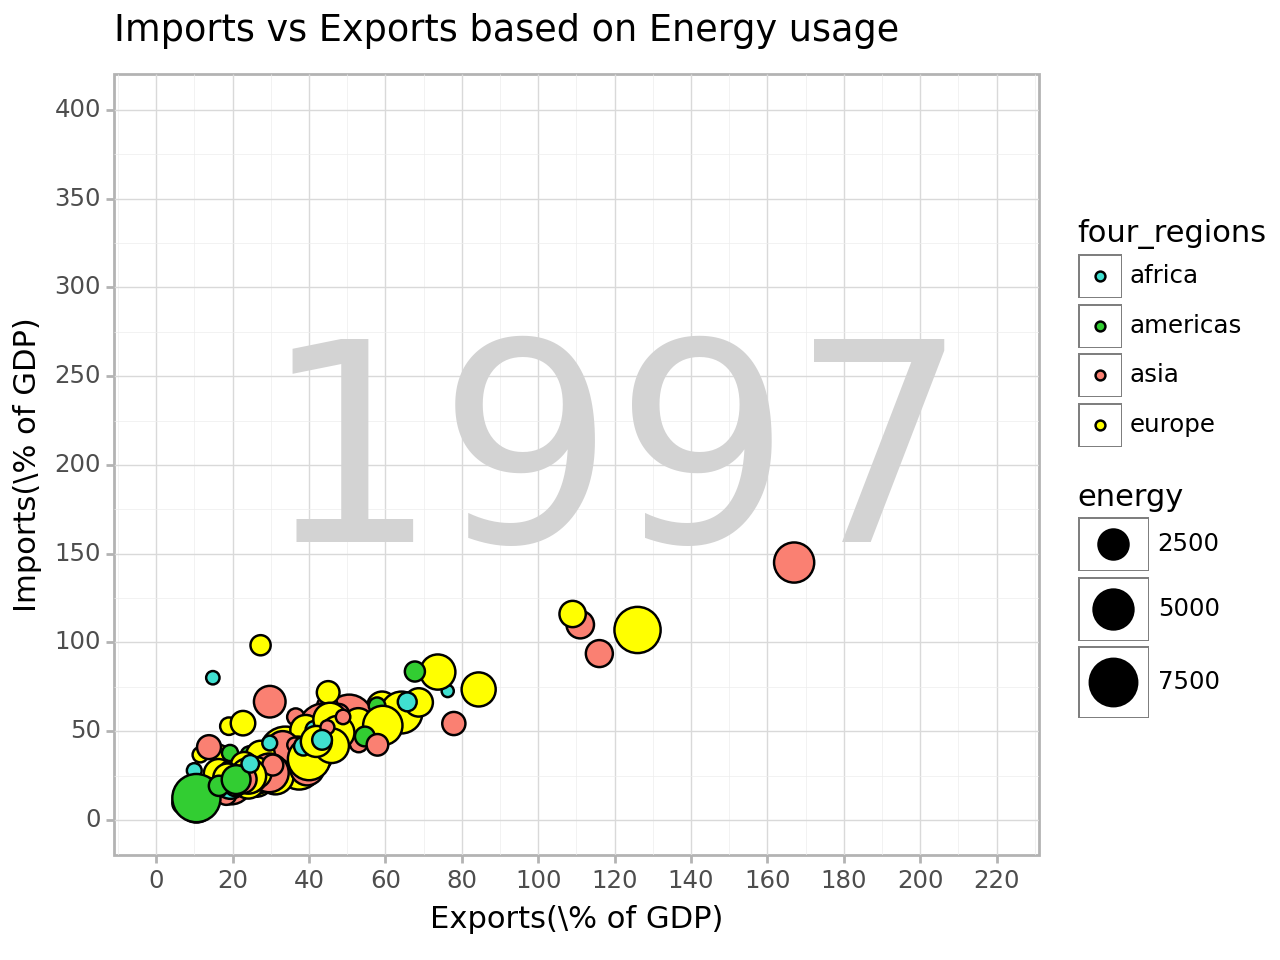

In [46]:
q2data['energy'] = pd.to_numeric(q2data['energy'], errors='coerce') # changing the column energy into numeric as str value won't allow for proper representation
q2data = q2data[q2data['energy'].notna()] #dropping nans
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'} #setting up colors for regions manually
plot = (
    ggplot(q2data,
           aes(
              x='exports',
              y='imports',
              fill='four_regions',
              size = 'energy')) + 
    annotate("text",
             x = 120,
             y = 200,
             label = "1997",
             size='100',
             color='lightgray'
             )+
    geom_point() +
    theme_light()+
    scale_fill_manual(values=region_colors) + 
    scale_size_continuous(range=[1, 10]) +
    scale_x_continuous(limits=[0, 220], breaks=range(0, 221, 20))+ #setting up break values for x-axis
    scale_y_continuous(limits=[0, 400], breaks=range(0, 401, 50))+ #setting up break values for y-axis
    labs(
        title='Imports vs Exports based on Energy usage',
        x='Exports(\% of GDP)',
        y='Imports(\% of GDP)',
        color='Region',
    )
)
print(plot)

<b>4.What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.</b>

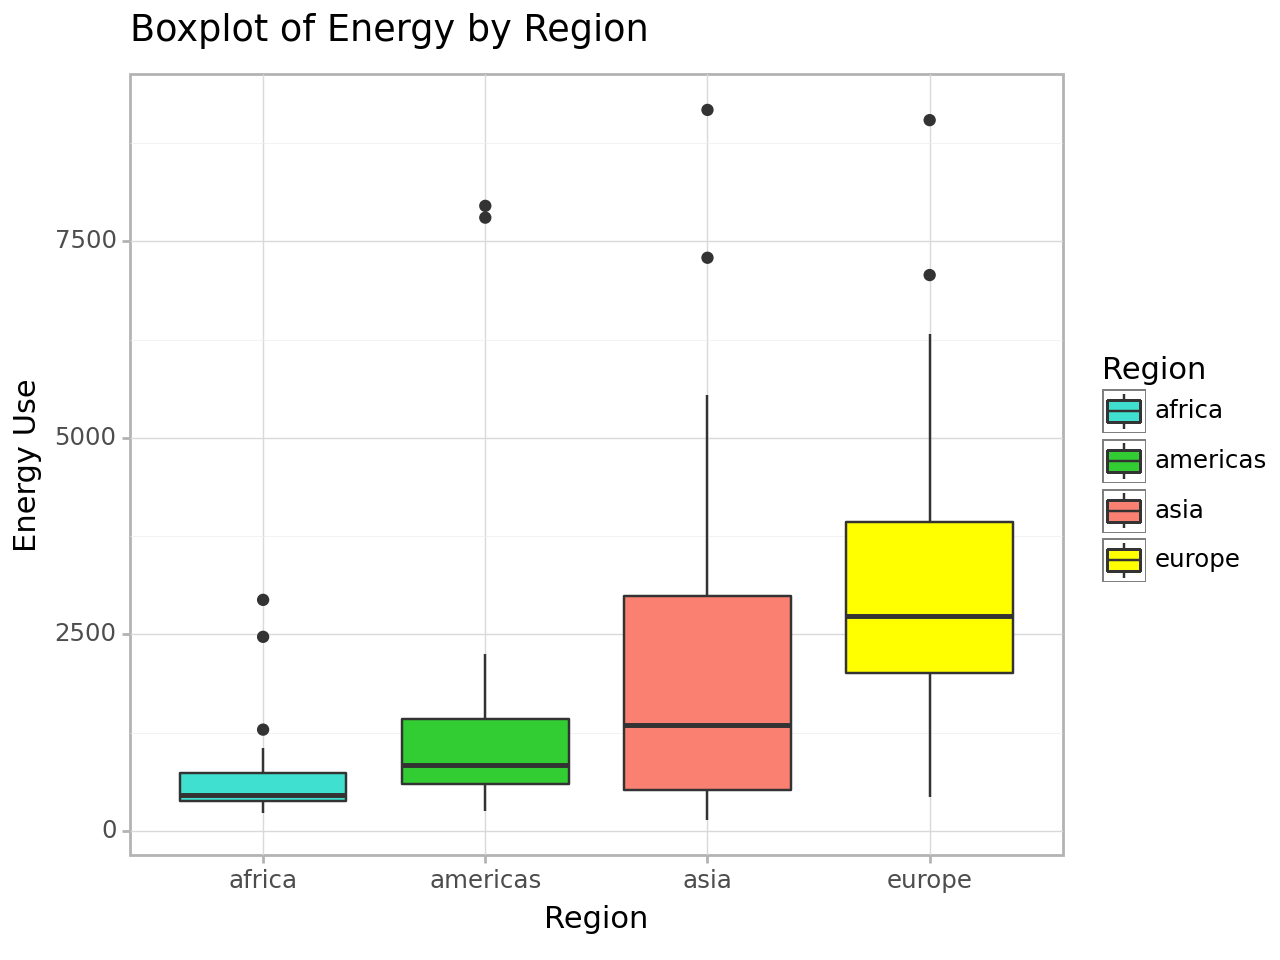

In [10]:
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen' #setting up colors for regions manually
}
plot = (
    ggplot(q2data,
           aes(
              x='four_regions',
              y='energy',
              fill='four_regions'
              )) +
    geom_boxplot() +
    scale_fill_manual(values=region_colors) +
    theme_light() +
    labs(
        title='Boxplot of Energy by Region',
        x='Region',
        y='Energy Use',
        fill='Region'
    )
)
print(plot)

<br>Representing the imports, exports data based on region and the energy usage of each person would require multiple box plots split on imports, exports and energy usage with x-axis having regions and y-axis having value. Correalating each of these individual graphs would yeild the required use cases but this puts a lot more work on users to know how to read box plots and relate with each other.

<H2>Task 3</H2>

<b>1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.</b>

Aesthetics are individuals using internet on x-axis, GDP/capita on y-axis, colored by region and size of the data point by Income.

<b>2. Import the q3data.csv dataset.</b>

In [47]:
q3data = pd.read_csv("q3data.csv")
print(q3data.size)

1935


In [48]:
q3data = q3data.dropna()
print(q3data.size)

1629


In [49]:
print(q3data.columns)

Index(['internet_users', 'gdp', 'income', 'year', 'country', 'four_regions',
       'six_regions', 'eight_regions', 'world_bank_region'],
      dtype='object')


<b>3. Recreate the plot as best you can using plotnine.</b>

C:\Users\viswa\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


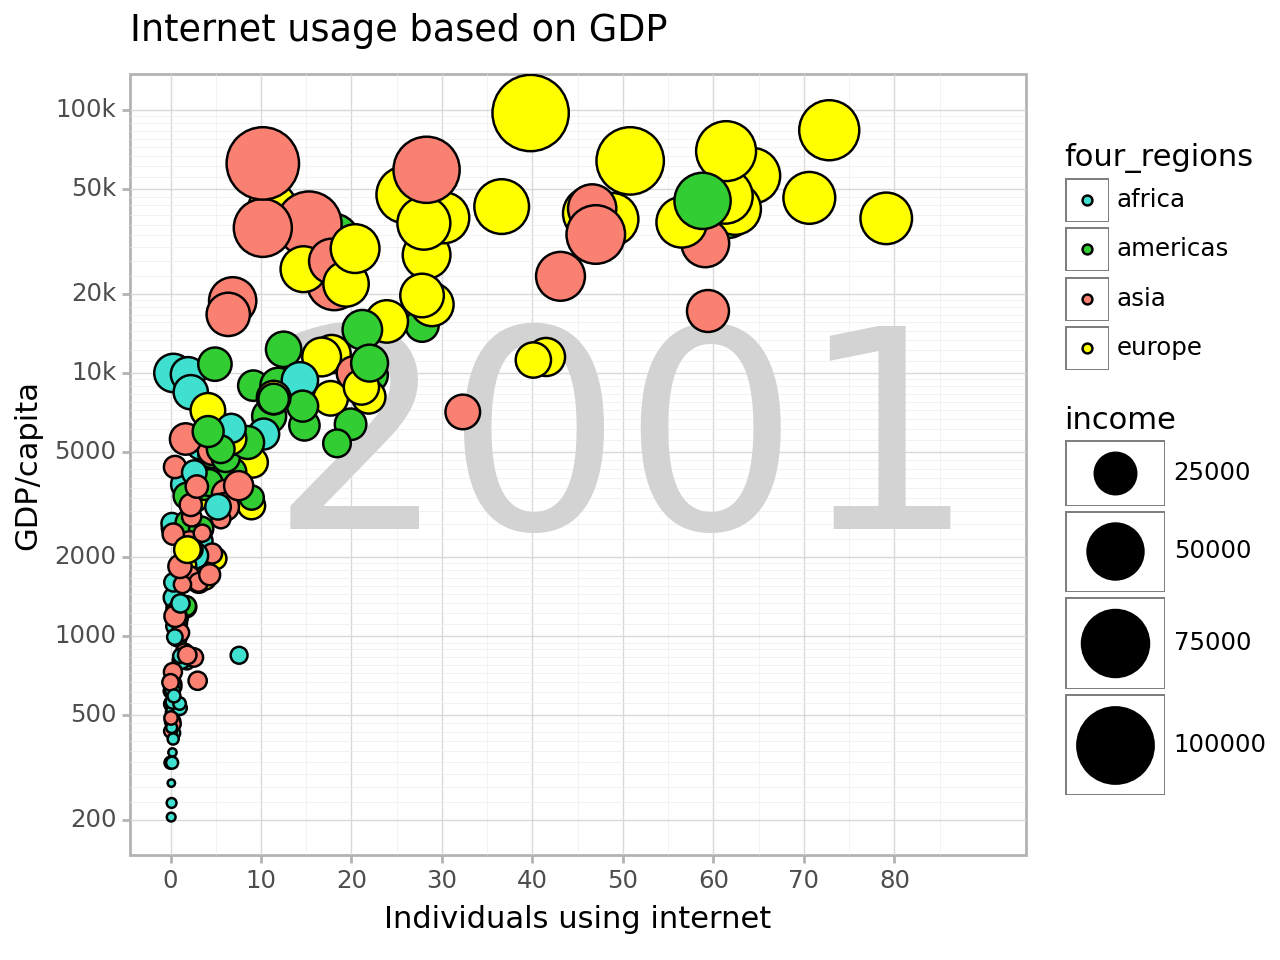

In [50]:
breaks_values = [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000] #initializing axis values manually
labels_values = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k','100k'] #initializing axis labels manually

region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'} #setting up colors for regions manually
plot = (
    ggplot(q3data,
           aes(
              x='internet_users',
              y='gdp',
              fill='four_regions',
              size = 'income')) +
    annotate("text",
             x = 50,
             y = 5000,
             label = "2001",
             size='100',
             color='lightgray'
             )+
    geom_point() +
    theme_light()+
    scale_fill_manual(values=region_colors) +
    scale_size_continuous(range=[1, 15]) +
    scale_x_continuous(limits=[0, 90], breaks=range(0, 90, 10))+ #setting up break values for x-axis
    labs(
        title='Internet usage based on GDP',
        x='Individuals using internet',
        y='GDP/capita',
        color='Region',
    )

    + scale_y_log10(breaks=breaks_values, labels=labels_values, limits=[200, 100000]) #setting up break values for y-axis
)
print(plot)

<b>4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it’s good or bad for visualizing these data.</b>

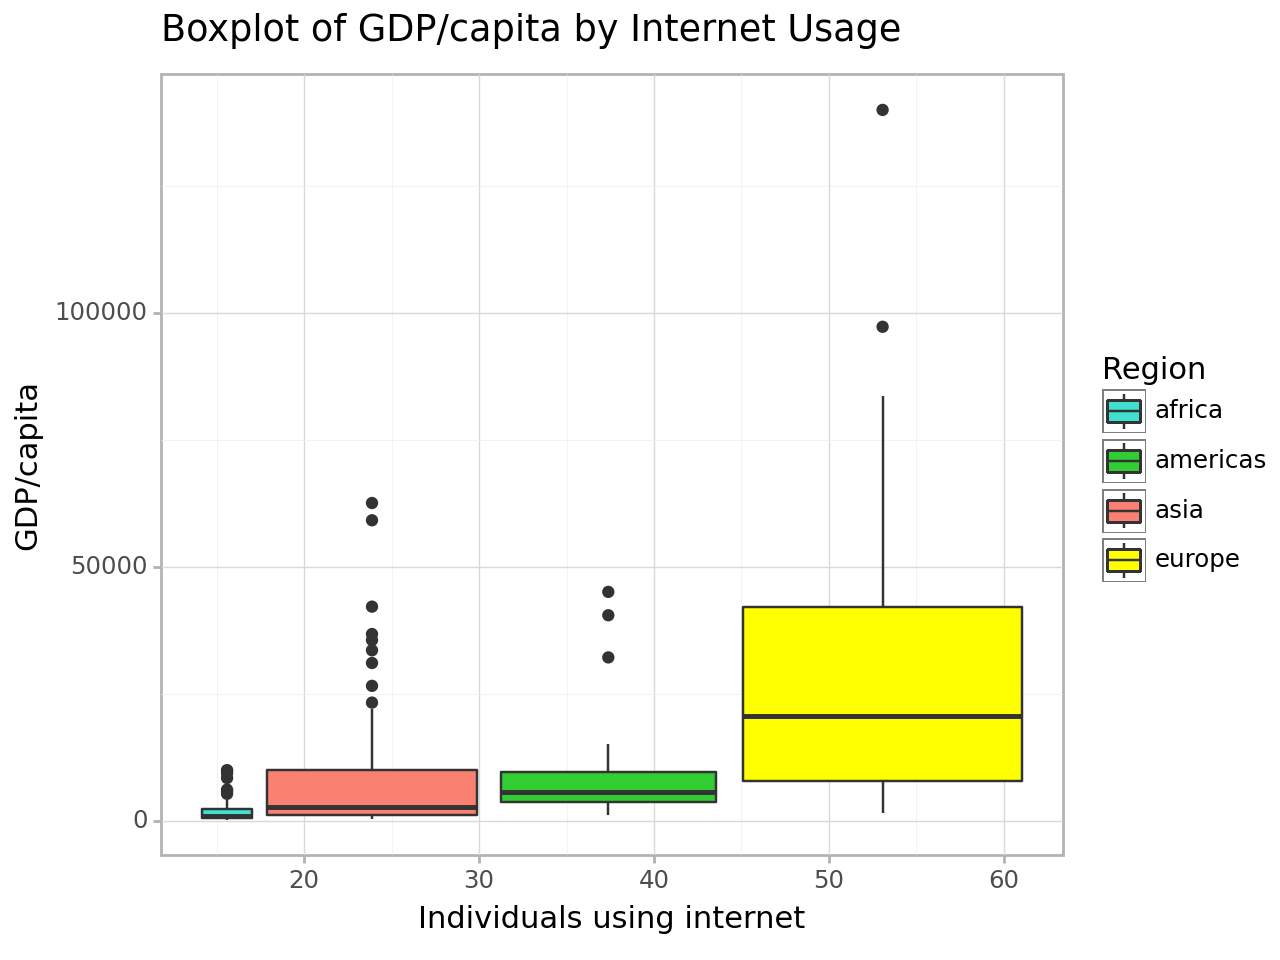

In [15]:
region_colors = {
    'asia': 'salmon',
    'africa': 'turquoise',
    'europe': 'yellow',
    'americas': 'limegreen'
}
plot = (
    ggplot(q3data,
           aes(
              x='internet_users',
              y='gdp',
              fill='four_regions',
              size='income'
              )) +
    geom_boxplot() +
    scale_fill_manual(values=region_colors) +
    theme_light() +
    labs(
        title='Boxplot of GDP/capita by Internet Usage',
        x='Individuals using internet',
        y='GDP/capita',
        fill='Region'
    )
)
print(plot)

<br>The box plot above gives us an idea on the usage of internet by individuals based on the GDP of the region. It gives the median usage of internet but not a complete perspective on the useage based on GDP of a region.